In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
X = np.random.randn(20,)
Y = 2*X + np.random.rand()
X.shape
X_train = X[: 16]
X_test = X[16: ]
y_train = Y[: 16]
y_test = Y[16: ]

def mean_squared_error(y_true, y_predicted):
     
    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost


In [26]:
def gd(x , y , iterations = 1000 , learning_rate = 0.05 , stop_point = 1e-4) :
    
    costs = []
    weights = []
    n = float(len(x))
    previous_cost = None
    current_weight = 0.1
    current_bias = 0.01
    
    for i in range(iterations) :
        y_pred = (current_weight * x) + current_bias
        
        current_cost = mean_squared_error(y , y_pred)
        
        if previous_cost and abs(previous_cost - current_cost) <= stop_point :
            break
            
        costs.append(current_cost)
        weights.append(current_weight)
        
        previous_cost = current_cost
        
        # calculating the gredients
        weight_derivative = -(2/n) * sum(x * (y - y_pred))
        bias_derivative = -(2/n) * sum(y - y_pred)
        
        # updating for weight and bais
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
        
    print('iteration : ' , i)
    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
    
    return current_weight, current_bias

iteration :  37


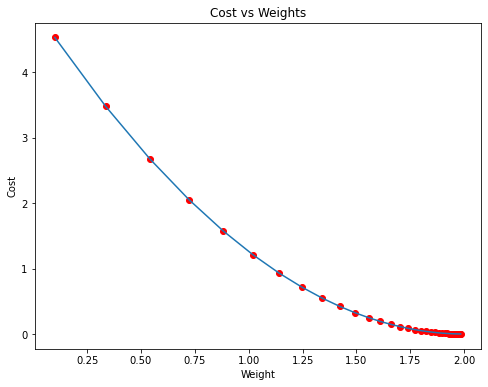

Estimated Weight: 1.9857112427646813
Estimated Bias: 0.25327682962706305


In [27]:
estimated_weight, estimated_bias = gd(X_train, y_train, iterations=2000)
print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")



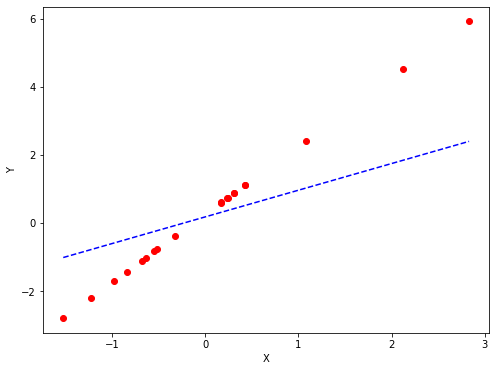

In [28]:
y_pred = estimated_weight*X_test + estimated_bias

plt.figure(figsize = (8,6))
plt.scatter(X, Y, marker='o', color='red')
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='blue',markerfacecolor='red',
            markersize=10,linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()